In [1]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
load_dotenv()

engine = create_engine(os.getenv("DB_STRING"))

query = 'SELECT * FROM tabela_txt'
df = pd.read_sql(query, engine)

df.head()

,id_transacao,data,tipo,valor,status
0,125f3dbe-622f-4c34-95b2-f599b5a92166,2024-06-03 09:57:54,transferencia,2459.72,pendente
1,570e119d-0d8a-486d-82e8-10e2ad60c502,2024-09-30 00:40:53,transferencia,3976.51,pendente
2,4e95cd04-772f-4d73-a404-dac1942b2dd2,2024-08-09 13:47:31,venda,3393.89,pendente
3,c7523a61-e99b-4537-b2c7-7018fb25b8c2,2024-09-07 03:16:11,transferencia,1762.53,concluido
4,5921d547-751c-4d23-b42d-f67d81a3528a,2024-01-08 18:52:13,compra,4060.21,pendente


In [18]:
df.info()

print(df.describe(),"\n")

print(df.head(10),"\n")

print(f"O DataFrame possui {df.shape[0]} linhas e {df.shape[1]} colunas.","\n")

print("Valores nulos por coluna:")
print(df.isnull().sum(),"\n")

print("Shape: ", df.shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_transacao  1119 non-null   object        
 1   data          1119 non-null   datetime64[ns]
 2   tipo          1119 non-null   object        
 3   valor         1119 non-null   float64       
 4   status        1119 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 43.8+ KB
                                data        valor
count                           1119  1119.000000
mean   2024-05-26 16:31:56.785522688  2569.364987
min              2024-01-01 05:50:17    17.250000
25%       2024-03-18 21:40:39.500000  1331.560000
50%              2024-05-29 16:17:53  2569.820000
75%              2024-08-04 07:21:03  3799.630000
max              2024-10-16 18:32:12  4994.670000
std                              NaN  1432.812021 

                    

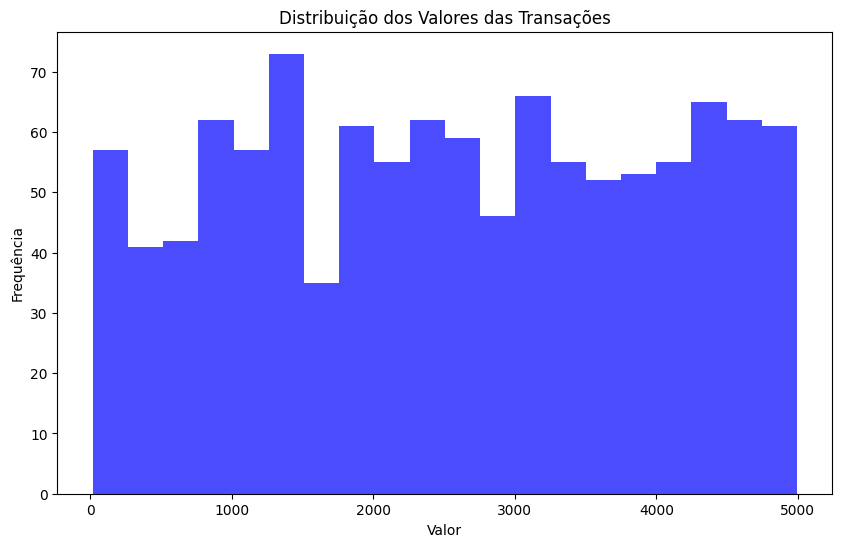

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['valor'], bins=20, color='blue', alpha=0.7)
plt.title('Distribuição dos Valores das Transações')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()


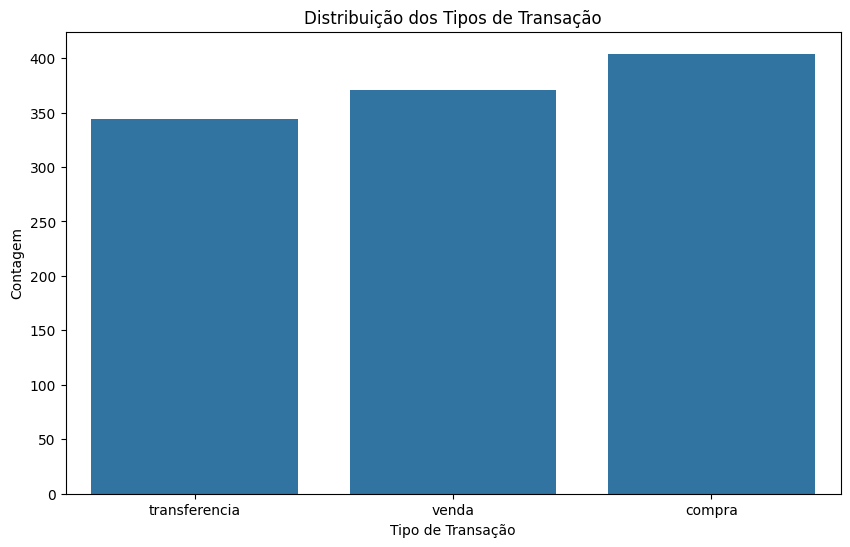

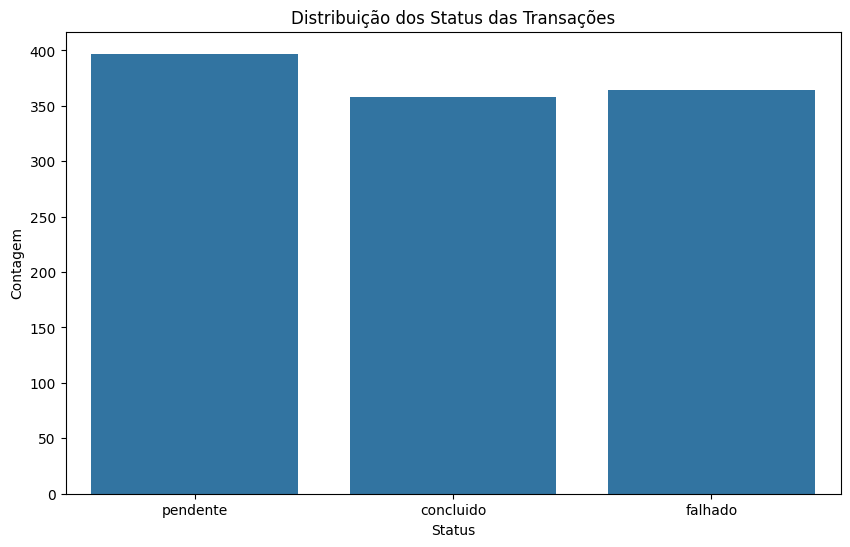

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='tipo')
plt.title('Distribuição dos Tipos de Transação')
plt.xlabel('Tipo de Transação')
plt.ylabel('Contagem')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='status')
plt.title('Distribuição dos Status das Transações')
plt.xlabel('Status')
plt.ylabel('Contagem')
plt.show()

Percentual de valores nulos por coluna:
id_transacao    0.0
data            0.0
tipo            0.0
valor           0.0
status          0.0
dtype: float64


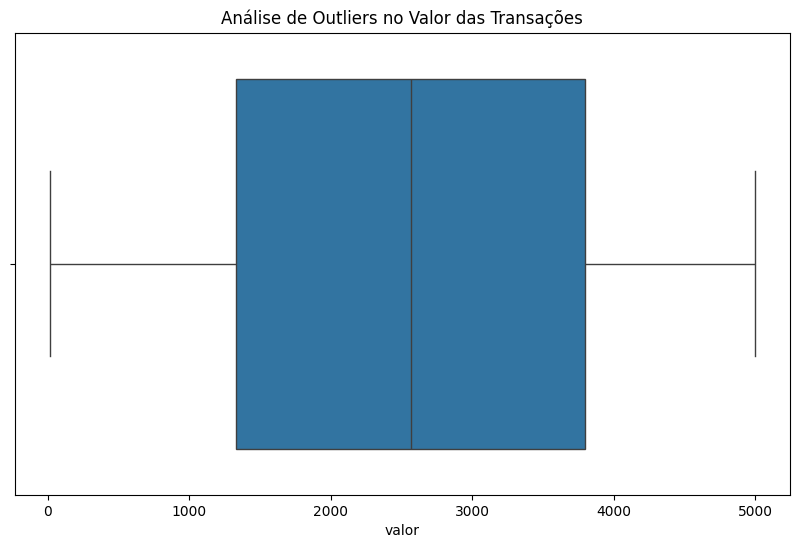

In [13]:
percent_missing = df.isnull().sum() * 100 / len(df)
print("Percentual de valores nulos por coluna:")
print(percent_missing)

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['valor'])
plt.title('Análise de Outliers no Valor das Transações')
plt.show()

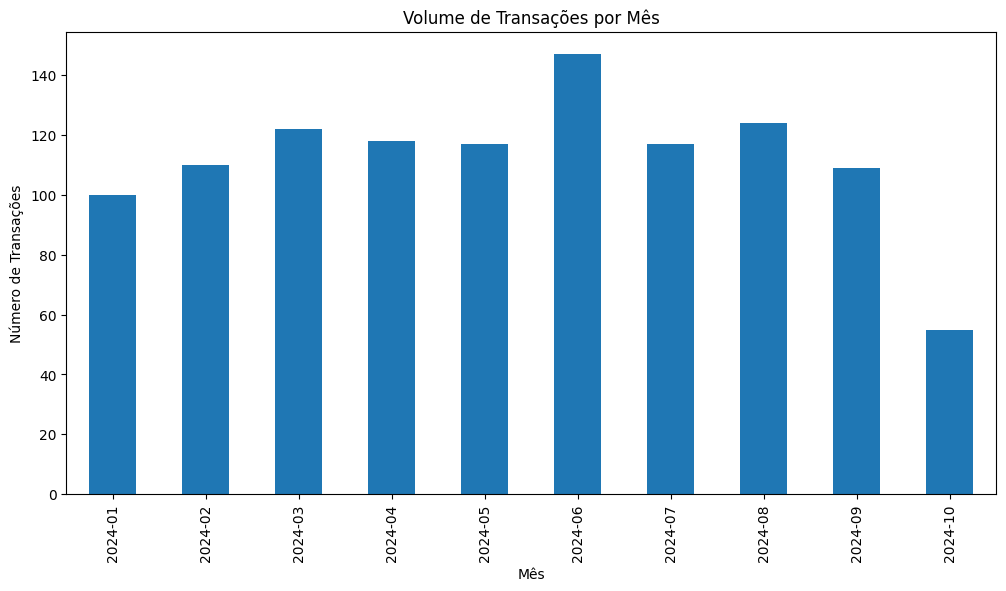

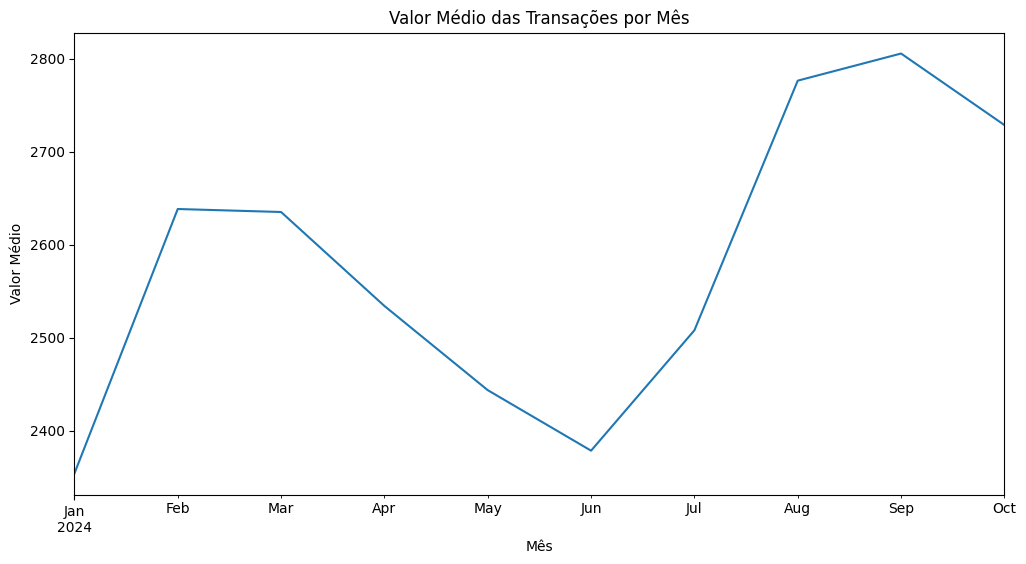

In [14]:
df['data'] = pd.to_datetime(df['data'])

transacoes_por_mes = df.groupby(df['data'].dt.to_period('M')).size()

transacoes_por_mes.plot(kind='bar', figsize=(12, 6))
plt.title('Volume de Transações por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Transações')
plt.show()

valor_medio_por_mes = df.groupby(df['data'].dt.to_period('M'))['valor'].mean()

valor_medio_por_mes.plot(kind='line', figsize=(12, 6))
plt.title('Valor Médio das Transações por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Médio')
plt.show()

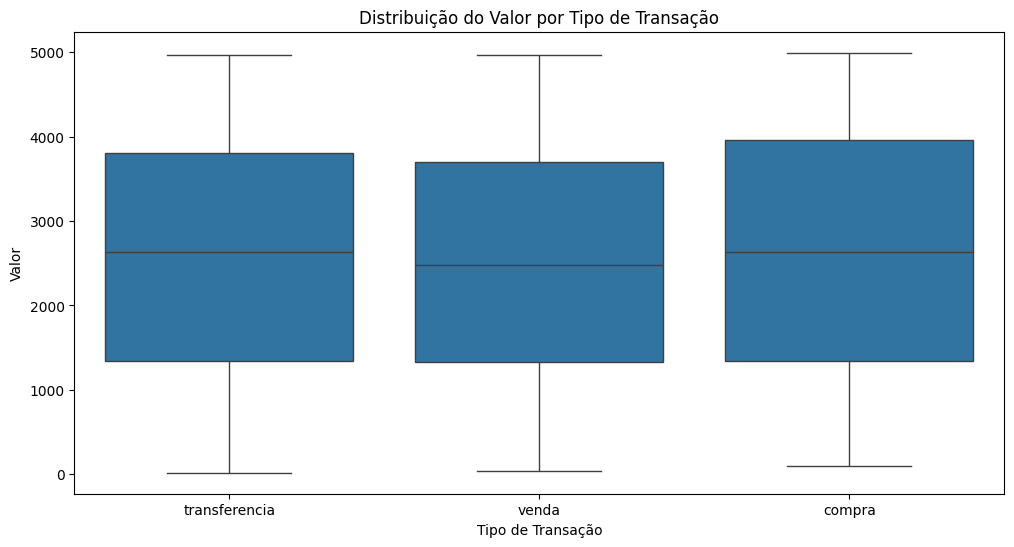

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='tipo', y='valor')
plt.title('Distribuição do Valor por Tipo de Transação')
plt.xlabel('Tipo de Transação')
plt.ylabel('Valor')
plt.show()

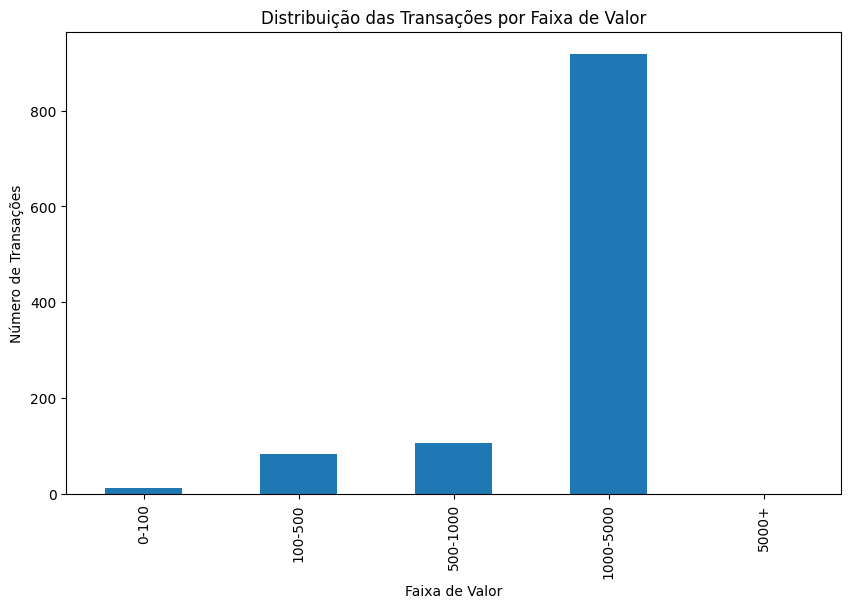

In [19]:
bins = [0, 100, 500, 1000, 5000, float('inf')]
labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000+']

df['faixa_valor'] = pd.cut(df['valor'], bins=bins, labels=labels)

faixa_valor_contagem = df['faixa_valor'].value_counts().sort_index()

faixa_valor_contagem.plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição das Transações por Faixa de Valor')
plt.xlabel('Faixa de Valor')
plt.ylabel('Número de Transações')
plt.show()

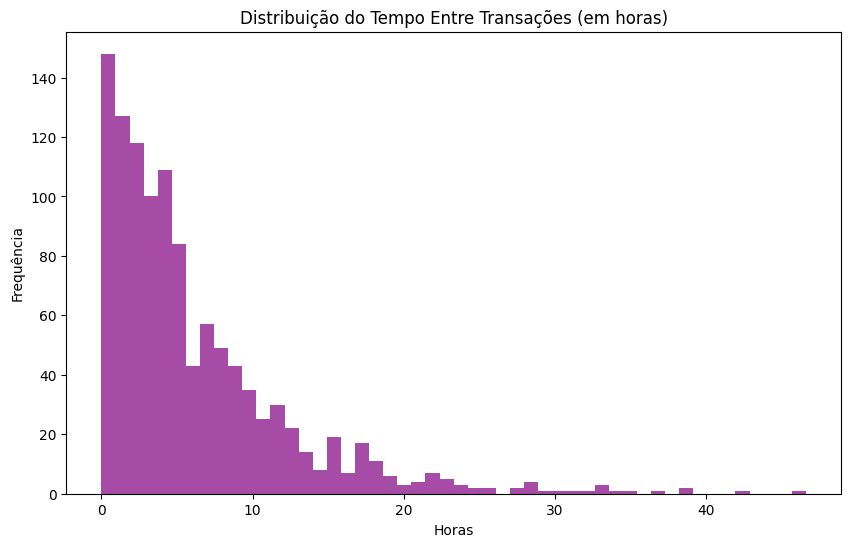

In [20]:
df = df.sort_values('data')

df['tempo_entre_transacoes'] = df['data'].diff().dt.total_seconds() / 3600  # diferença em horas

plt.figure(figsize=(10, 6))
plt.hist(df['tempo_entre_transacoes'].dropna(), bins=50, color='purple', alpha=0.7)
plt.title('Distribuição do Tempo Entre Transações (em horas)')
plt.xlabel('Horas')
plt.ylabel('Frequência')
plt.show()


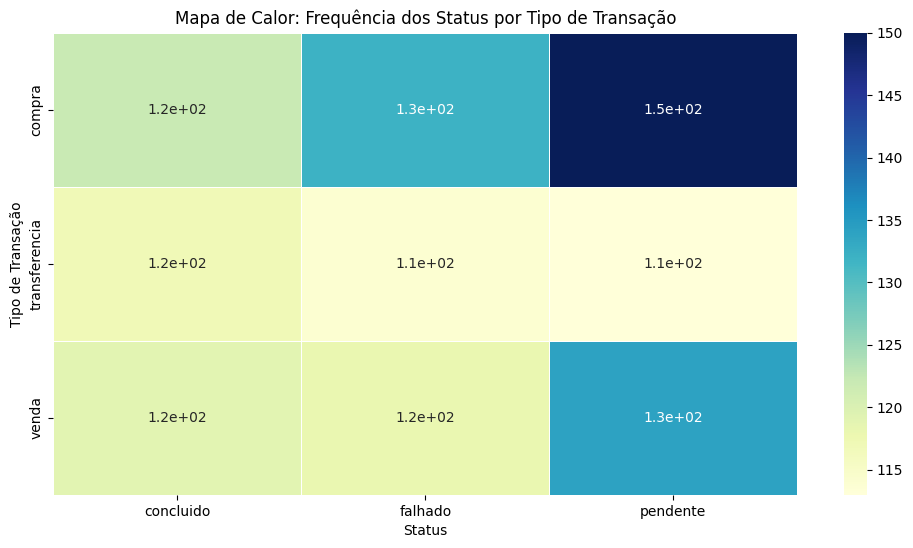

In [21]:
# Criar uma tabela cruzada para contar combinações de tipo de transação e status
tipo_status = pd.crosstab(df['tipo'], df['status'])

# Plotar o mapa de calor da tabela cruzada
plt.figure(figsize=(12, 6))
sns.heatmap(tipo_status, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Mapa de Calor: Frequência dos Status por Tipo de Transação')
plt.xlabel('Status')
plt.ylabel('Tipo de Transação')
plt.show()
